with histogram

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

# Load the two CSV files
file_path_1 = '/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/World_Stations_v2.csv'  # previous station
file_path_2 = '/Users/yubinbaaniya/Library/CloudStorage/Box-Box/Jorge dessertation/New added station.csv'   # new station

In [2]:
df1 = pd.read_csv(file_path_1, usecols=['Latitude', 'Longitude'])
df2 = pd.read_csv(file_path_2, usecols=['Latitude', 'Longitude'])

/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_86541/1079178826.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/0n/296qsft52w53ggpnw204hrxw0000gq/T/ipykernel_86541/1079178826.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_lat.set_xticklabels([f'{abs(int(val))}' for val in x_ticks])


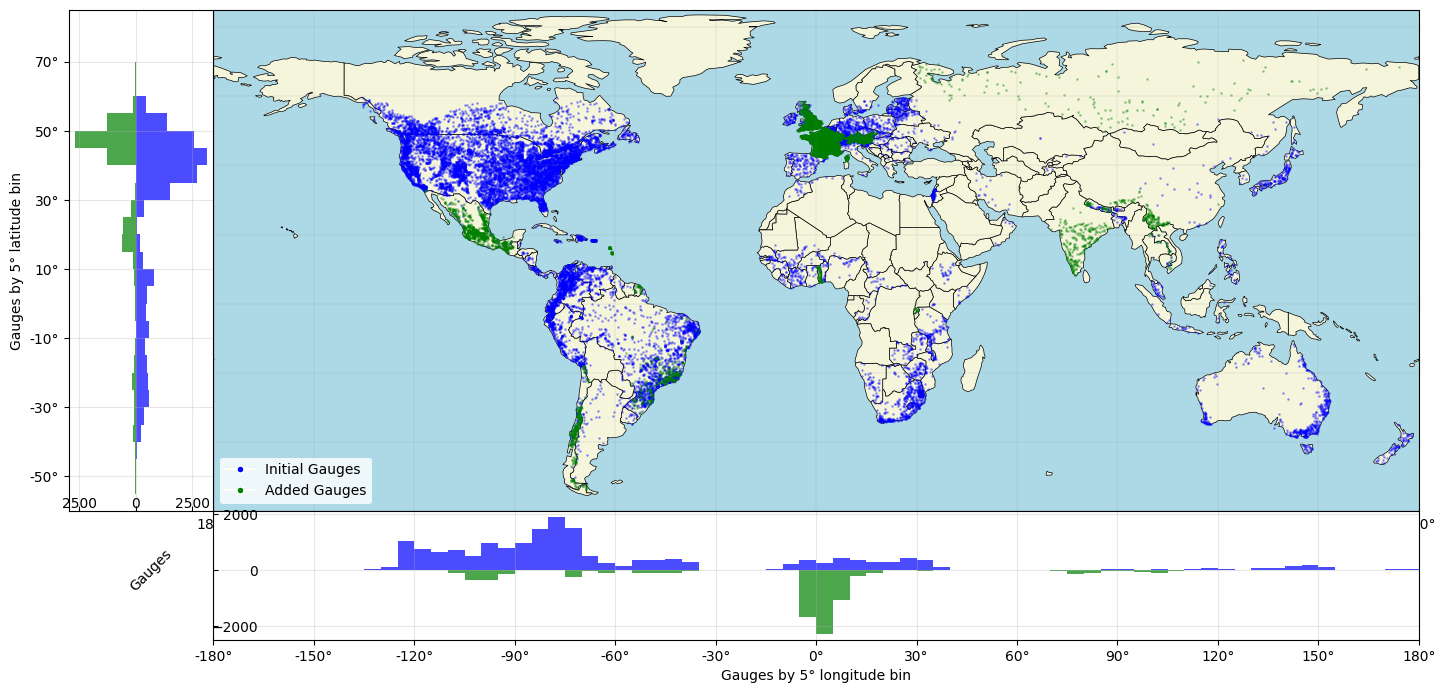

In [6]:
def create_zero_flow_map(zero_flow_data, no_zero_flow_data, title='Zero Flow Observations Distribution'):
    # Create figure with GridSpec
    fig = plt.figure(figsize=(15,7))
    gs = GridSpec(2, 2, width_ratios=[0.6, 5], height_ratios=[3, .77])
    
    # Create the main map
    ax_map = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
    
    # Load and plot world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[world.name != "Antarctica"]
    world.plot(ax=ax_map, color='beige', edgecolor='black', linewidth=0.5)
    # background colour
    ax_map.set_facecolor('#ADD8E6') 
    
    
    # Plot both datasets
    ax_map.scatter(zero_flow_data['Longitude'], zero_flow_data['Latitude'],
                  color='blue', s=1, alpha=0.3, transform=ccrs.PlateCarree(),
                  label='Initial Gauge')
    ax_map.scatter(no_zero_flow_data['Longitude'], no_zero_flow_data['Latitude'],
                  color='green', s=1, alpha=0.3, transform=ccrs.PlateCarree(),
                  label='Added Gauge')
    
    # Create bins for histograms
    lon_bins = np.arange(-180, 181, 5)
    lat_bins = np.arange(-60, 85, 5)
    
    # Create latitude histogram
    ax_lat = fig.add_subplot(gs[0, 0], sharey=ax_map)
    
    # Calculate histograms for latitude
    lat_hist_zero, _ = np.histogram(zero_flow_data['Latitude'], bins=lat_bins)
    lat_hist_no_zero, _ = np.histogram(no_zero_flow_data['Latitude'], bins=lat_bins)
    
    # Plot latitude histograms
    ax_lat.barh(lat_bins[:-1] + 2.5, lat_hist_zero, height=5,
                color='blue', alpha=0.7, label='Initial Gauge')
    ax_lat.barh(lat_bins[:-1] + 2.5, -lat_hist_no_zero, height=5,
                color='green', alpha=0.7, label='Added Gauge')

    # Set y-ticks
    y_ticks = np.arange(-90, 91, 20)  # Define ticks from -90 to 90 at intervals of 20 degrees
    ax_lat.set_yticks(y_ticks)
    ax_lat.set_yticklabels([f'{int(val)}°' for val in y_ticks])

    # Adjust tick parameters to move them inside and change padding
    ax_lat.tick_params(axis="x", direction="in", pad=-10)

    # Set x-tick labels to be positive only
    x_ticks = ax_lat.get_xticks()
    ax_lat.set_xticklabels([f'{abs(int(val))}' for val in x_ticks])

    # Set labels and grid
    ax_lat.set_ylabel('Gauges by 5° latitude bin')
    ax_lat.grid(True, alpha=0.3)
    
    # Create longitude histogram
    ax_lon = fig.add_subplot(gs[1, 1], sharex=ax_map)
    
    # Calculate histograms for longitude
    lon_hist_zero, _ = np.histogram(zero_flow_data['Longitude'], bins=lon_bins)
    lon_hist_no_zero, _ = np.histogram(no_zero_flow_data['Longitude'], bins=lon_bins)

    # Plot longitude histograms
    ax_lon.bar(lon_bins[:-1] + 2.5, lon_hist_zero, width=5, 
               color='blue', alpha=0.7, label='Initial Gauge')
    ax_lon.bar(lon_bins[:-1] + 2.5, -lon_hist_no_zero, width=5, 
               color='green', alpha=0.7, label='Added Gauge')
    
    # Set x-ticks explicitly for the longitude axis
    x_ticks = np.arange(-180, 181, 30)
    ax_lon.set_xticks(x_ticks)
    ax_lon.set_xticklabels([f'{int(val)}°' for val in x_ticks])
    
    ax_lon.tick_params(axis="y", direction="in", pad=-32)

    # Update labels and grid
    ax_lon.set_xlabel('Gauges by 5° longitude bin')
    ax_lon.set_ylabel('Gauges', rotation=45, labelpad=40)
    ax_lon.grid(True, alpha=0.3)
    
    # Set map limits
    ax_map.set_xlim(-180, 180)
    ax_map.set_ylim(-60, 85)
    
    # Add gridlines to map
    gl = ax_map.gridlines(draw_labels=True, linewidth=0.2,
                         color='gray', alpha=0.5,
                         xlocs=np.arange(-180, 181, 30),
                         ylocs=np.arange(-60, 85, 20))
    gl.top_labels = False
    gl.right_labels = False
    
    # Add legend to map
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
               label='Initial Gauges', markersize=5),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green',
               label='Added Gauges', markersize=5)
    ]
    ax_map.legend(handles=legend_elements, loc='lower left', frameon=True,
                 facecolor='white', edgecolor='none')
    
    # Adjust spacing between subplots
    gs.update(wspace=0.00, hspace=0.00)
    
    # Fine-tune the space
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    
    return fig
# Create the map
fig = create_zero_flow_map(df1, df2, title='Gauge Distribution')

# Save the figure if needed
plt.savefig('/Users/yubinbaaniya/Downloads/world_gauge_with_histogram.png', dpi=1800, bbox_inches='tight')

# Show the plot
plt.show()